# Self Consistent Field Calculation Interface

This notebook is an interface to handle the SCF calculation and also for visualization of the results

At first we would like to import the main modules and packages which we will need for our purposes.\
`ExecutorSCF` is class responsible for calculation of the SCF procedure.\
`ExecutorSCF.run_calculation` returns an object which carries the state of converged calculation.\
`OutputHandlerSCF` is responsible for manipulation of object returned by the `ExecutorSCF.run_calculation`

In [1]:
import numpy as np
import json
from SCF_method.calculation_executor import ExecutorSCF
from SCF_method.output_handler import OutputHandlerSCF

Input object for the `ExecutorSCF` initialization is input dictionary\
Input dictionary can be easily obtained from the json file as some human readable data container\
To obtain the data for calculation we wil use this script:

In [2]:
with open('SCF_method\input_data\H2_gaussian.json') as input_file:
    input_dict = json.load(input_file)
input_dict

{'molecule_definition': {'nuclei_positions': [[0, 0, 0.70053],
   [0, 0, -0.70053]],
  'atomic_numbers': [1, 1],
  'number_of_electrons': 2},
 'basis': {'type': 'gaussian',
  'params': {'alphas': [4.3448, 0.66049, 0.13669],
   'nuclei_positions': [[0, 0, 0.70053], [0, 0, -0.70053]],
   'normalization_factors': [[1, 1, 1], [1, 1, 1]]}},
 'integration_config': {'type': 'MC',
  'n_samples': 100000000,
  'boundaries': [-7, 7]},
 'convergence_config': {'max_iteration': 5000,
  'averaging': True,
  'delta': 1e-06}}

As we can see, input data consists of:
- molecular data 
- data about the basis set
- integration data 
- convergence data 

Molecular data has information about the molecule itself:
- nuclei positions (set of coordinates for particular nuclei)
- atomic numbers of nuclei in molecule(set of integers arranged in the same way as nuclei positions)
- number of electrons (total number of electrons present in given molecule system)

In our case we have chosen hydrogen molecule H2 with two hydrogen nuclei 1.41 atomic units appart and with two electrons 

Basis data carries information about the basis set used for calculation: 
- type of basis functions (gaussian, fourier, ... )
- parameters specific for given type of basis

Gaussian type of basis was chosen also in our hydrogen molecule case

Integration config data carries information for init of integrators for molecular integrals: 
- type of integration (Monte Carlo, Scipy, ... )
- parameters specific for given integration method ( for Monte Carlo it is number of samples and boundaries of integration domain )

In our case we have used Monte Carlo integration for conveniet multi-dimensional integration

Convergence config data carries information about convergence of SCF procedure consideration: 
- maximum number of iterations to cut the procedure
- averaging flag for the cases when procedure is adly convergent and oscilating ( This is also our case )
- delta parameter, which is the level of convergence where we should stop iteration process

All from the mentioned data information are stored in the appropriate data objects during `ExecutorSCF` initialization:

In [3]:
scf_exec = ExecutorSCF(input_dict)

2021-01-06 13:57:11 [INFO] [calculation_executor.py:14] Preparing input data
2021-01-06 13:57:11 [INFO] [calculation_executor.py:15] Initializing molecule
2021-01-06 13:57:11 [INFO] [calculation_executor.py:17] Initializing basis set
2021-01-06 13:57:11 [INFO] [calculation_executor.py:19] Initializing integrators


The calculation itself consists of calculation of molecular integrals:
- Overlap integral $\int \phi_{\nu}^\star \phi_{\mu} \,dr $
- Kinetic energy integral $\int \phi_{\nu}^\star \Delta \phi_{\mu} \,dr $
- Nuclear potential energy integral $\int \phi_{\nu}^\star \sum_{a} \frac{-Z_{a}}{|r-R_{a}|} \phi_{\mu} \,dr $
- Two electron potential energy integral $\int \phi_{\nu}^\star(1)\phi_{\mu}(1) \frac{1}{|r_{1} - r_{2}|} \phi_{\lambda}^\star(2)\phi_{\sigma}(2) \,dr_{1}dr_{2} $

Using these integrals we will run iterative SCF precedure described in:\
`Attila Szabo, Neil S. Ostlund; Modern Quantum Chemistry; page 146`

The whole procedure we can run using `ExecutorSCF.run_calculation`

In [4]:
scf_final_state = scf_exec.run_calculation()

2021-01-06 13:57:23 [INFO] [overlap_matrix.py:12] Calculating S - orbital overlap matrix
2021-01-06 14:00:52 [INFO] [overlap_matrix.py:33] Basis renormalization with coeffs: [0.46408375 1.91476414 6.24221265 0.46815801 1.91639672 6.24313162]
2021-01-06 14:00:52 [INFO] [kinetic_energy_matrix.py:14] Calculating T - kinetic energy matrix
2021-01-06 14:21:44 [INFO] [nuclear_attraction_matrix.py:12] Calculating V_nuc - nuclear attraction matrix
2021-01-06 14:28:19 [INFO] [two_electron_integral_matrix.py:11] Calculating mnls - two electron integral matrix
2021-01-06 16:13:56 [INFO] [procedure.py:39] Running iterative SCF procedure
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 0.7780905830496029
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4105905855546148
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 0.3216437250284896
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor i

2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843157
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832403
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725583
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431625
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832423
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725595
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432113
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832395
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725583
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843158
2021-01-06 16:13:56 [INFO] [

2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832348
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 0.855536636172554
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432024
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832403
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725582
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431525
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832375
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725564
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 0.444270656584316
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832421
2021-01-06 16:13:56 [INFO] [ca

2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725578
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431875
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832363
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725528
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843204
2021-01-06 16:13:56 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832344
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725544
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843116
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832355
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725533
2021-01-06 16:13:57 [INFO] [c

2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431597
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832346
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725517
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843174
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832421
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725597
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843175
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832452
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725629
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431736
2021-01-06 16:13:57 [INFO] [

2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832332
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725537
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431614
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383239
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725567
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.444270656584315
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832395
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725578
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843159
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832386
2021-01-06 16:13:57 [INFO] [cal

2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725598
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431725
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832401
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725582
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431586
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832408
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725599
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843149
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832401
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725563
2021-01-06 16:13:57 [INFO] [

2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843194
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832377
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725563
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843212
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832417
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.855536636172557
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432247
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832412
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725614
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431597
2021-01-06 16:13:57 [INFO] [c

2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832395
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725575
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.444270656584321
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832397
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725575
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432024
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832401
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725592
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431686
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383242
2021-01-06 16:13:57 [INFO] [ca

2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725569
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843207
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 1.28861250938324
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725569
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843217
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832361
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.855536636172557
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431847
2021-01-06 16:13:57 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832383
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725552
2021-01-06 16:13:58 [INFO] [calc

2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431686
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832426
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.855536636172561
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843187
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832432
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725605
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431547
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832383
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725556
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432424
2021-01-06 16:13:58 [INFO] [

2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832337
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725525
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843187
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832346
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725526
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431986
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832395
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725559
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843128
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 1.28861250938324
2021-01-06 16:13:58 [INFO] [cal

2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725562
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432197
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832417
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725589
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843204
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832401
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725592
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843192
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832397
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725574
2021-01-06 16:13:58 [INFO] [c

2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431775
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832395
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725593
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843179
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832352
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725527
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843177
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832375
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725548
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.444270656584321
2021-01-06 16:13:58 [INFO] [ca

2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832395
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725595
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.444270656584316
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832421
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725593
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843215
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832412
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725589
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431797
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832372
2021-01-06 16:13:58 [INFO] [ca

2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725599
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843182
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832417
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725606
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843186
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832406
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725583
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843179
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383236
2021-01-06 16:13:58 [INFO] [calculation_iterator.py:64] Convergence factor is 0.855536636172556
2021-01-06 16:13:58 [INFO] [calc

2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843147
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832417
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725572
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432097
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832415
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725605
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843199
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832437
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725614
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431697
2021-01-06 16:13:59 [INFO] [

2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832381
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725553
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843143
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383235
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725535
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843149
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383238
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725549
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431847
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832368
2021-01-06 16:13:59 [INFO] [cal

2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725574
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843197
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832386
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725577
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843185
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832408
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725574
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843209
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832352
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725547
2021-01-06 16:13:59 [INFO] [ca

2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431736
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832375
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725563
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431975
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832432
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725605
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843176
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832363
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725559
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431847
2021-01-06 16:13:59 [INFO] 

2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832421
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725595
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431686
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832403
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725598
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431364
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832395
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725576
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431647
2021-01-06 16:13:59 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832395
2021-01-06 16:13:59 [INFO] 

2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725535
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432285
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832357
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725533
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843178
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832361
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725548
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843206
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832375
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725537
2021-01-06 16:14:00 [INFO] [c

2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843192
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832406
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725597
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431464
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832348
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725525
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843224
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832355
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725547
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843176
2021-01-06 16:14:00 [INFO] [c

2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832363
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725556
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431836
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383236
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.855536636172555
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431736
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832392
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725567
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.444270656584317
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832417
2021-01-06 16:14:00 [INFO] [cal

2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.85553663617256
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843192
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832423
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725613
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.444270656584314
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832421
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725599
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431464
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832366
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725558
2021-01-06 16:14:00 [INFO] [calc

2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431886
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832377
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725539
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432213
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832386
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725567
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432113
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 1.28861250938324
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.855536636172559
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843154
2021-01-06 16:14:00 [INFO] [ca

2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832415
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725587
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431925
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832417
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725603
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843154
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832421
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725592
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843204
2021-01-06 16:14:00 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383241
2021-01-06 16:14:01 [INFO] [ca

2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.855536636172554
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431786
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832388
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725553
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431497
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383239
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.855536636172556
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432036
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832375
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725557
2021-01-06 16:14:01 [INFO] [ca

2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843161
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383239
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725574
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431875
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 1.28861250938324
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725578
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843172
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383239
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725563
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843191
2021-01-06 16:14:01 [INFO] [calcu

2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383241
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.855536636172557
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431925
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383239
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725574
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432047
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832381
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725576
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.444270656584318
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832423
2021-01-06 16:14:01 [INFO] [calc

2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.855536636172556
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432263
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832448
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725619
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843148
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832428
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725605
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431736
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383241
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725589
2021-01-06 16:14:01 [INFO] [ca

2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843203
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 1.28861250938324
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725589
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431664
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832401
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725574
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431736
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832401
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725589
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843204
2021-01-06 16:14:01 [INFO] [ca

2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832412
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725587
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843209
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832357
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725576
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431736
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832366
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725539
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432036
2021-01-06 16:14:01 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832395
2021-01-06 16:14:01 [INFO] [

2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725573
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843182
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832352
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725543
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431747
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832421
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725568
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843229
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832397
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725586
2021-01-06 16:14:02 [INFO] [c

2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431947
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832395
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725578
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431864
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832417
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725599
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.444270656584316
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832388
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725583
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431564
2021-01-06 16:14:02 [INFO] [

2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832408
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725583
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431836
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832355
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725556
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431586
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383239
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725574
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431636
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383238
2021-01-06 16:14:02 [INFO] [c

2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.855536636172556
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843211
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383239
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.855536636172558
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.444270656584317
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832352
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725537
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431575
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832408
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725584
2021-01-06 16:14:02 [INFO] [calcu

2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431386
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832423
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725596
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843145
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383237
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725567
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843157
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383237
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725529
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.444270656584322
2021-01-06 16:14:02 [INFO] [calc

2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832406
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725589
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843179
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832375
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725556
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843188
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 1.28861250938324
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.855536636172557
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843212
2021-01-06 16:14:02 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832355
2021-01-06 16:14:02 [INFO] [calcu

2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725549
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431875
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832408
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725583
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843171
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832412
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725599
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431825
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832417
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725595
2021-01-06 16:14:03 [INFO] [

2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431575
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832348
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725536
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843217
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832366
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725544
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843107
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832368
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725537
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432136
2021-01-06 16:14:03 [INFO] [

2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832363
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725546
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843203
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832377
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.855536636172557
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431786
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832428
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725595
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843161
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832375
2021-01-06 16:14:03 [INFO] [ca

2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725573
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431636
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832415
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725584
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843174
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832375
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725552
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843271
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383238
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725573
2021-01-06 16:14:03 [INFO] [ca

2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431814
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832372
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725565
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431786
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383238
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725556
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431736
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383234
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725522
2021-01-06 16:14:03 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843179
2021-01-06 16:14:03 [INFO] [c

2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832368
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725548
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843197
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832375
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725555
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432124
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832361
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725556
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843201
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832403
2021-01-06 16:14:04 [INFO] [c

2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725576
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431886
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383238
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725558
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843247
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832401
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725589
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843171
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832435
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.855536636172561
2021-01-06 16:14:04 [INFO] [cal

2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843201
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832401
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725585
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432147
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 1.28861250938324
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.855536636172559
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843145
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832348
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725515
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431825
2021-01-06 16:14:04 [INFO] [cal

2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832401
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725573
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843156
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832352
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725534
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431547
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383245
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725605
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.444270656584319
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 1.28861250938324
2021-01-06 16:14:04 [INFO] [calcu

2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725578
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431913
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832403
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725575
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431886
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383242
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.855536636172559
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431936
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832392
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.855536636172557
2021-01-06 16:14:04 [INFO] [ca

2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432185
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832377
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725566
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431897
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832386
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725565
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432124
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832386
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725572
2021-01-06 16:14:04 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432
2021-01-06 16:14:04 [INFO] [c

2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832397
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.855536636172555
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843201
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832437
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725614
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431736
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832366
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725553
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432097
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832348
2021-01-06 16:14:05 [INFO] [c

2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.855536636172557
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843192
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832361
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725552
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432013
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832412
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725566
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432296
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832406
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.85553663617256
2021-01-06 16:14:05 [INFO] [cal

2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431303
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832406
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725569
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843225
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383239
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725586
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843177
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832423
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.855536636172561
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843146
2021-01-06 16:14:05 [INFO] [cal

2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832417
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725599
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843211
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832457
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725639
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843118
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832392
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725565
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432097
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832392
2021-01-06 16:14:05 [INFO] [c

2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725601
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431586
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832395
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725568
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843209
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 1.288612509383239
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725574
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843201
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832408
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725597
2021-01-06 16:14:05 [INFO] [ca

2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431625
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832355
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725525
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843182
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832397
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725557
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843212
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 1.28861250938324
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725584
2021-01-06 16:14:05 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431725
2021-01-06 16:14:05 [INFO] [ca

2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832372
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725559
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832361
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725559
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658432086
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832428
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725606
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431103
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832397
2021-01-06 16:14:06 [INFO] [ca

2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 0.855536636172562
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843163
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832372
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725564
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843184
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832408
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725567
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843229
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832381
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725572
2021-01-06 16:14:06 [INFO] [cal

2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431736
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832403
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 0.855536636172559
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 0.44427065658431836
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832417
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725607
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843143
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 1.2886125093832341
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 0.8555366361725535
2021-01-06 16:14:06 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4442706565843187
2021-01-06 16:14:06 [INFO] [c

After the calculation (which may take several hours :-) ) we can push the calculated object into the `OutputHandlerSCF` with the given basis

In [17]:
scf_handler = OutputHandlerSCF(scf_final_state, scf_exec.basis)

Hadler can help us to investigate quantities of our interest

# One electron energies

In [42]:
E_electron = scf_handler.electron_energies()
E_electron

array([5.85654114, 6.07741133, 0.07773829, 1.27860416, 0.93201675,
       0.52863866])

# Electron density matrix

In [45]:
np.round(scf_handler.electron_density_matrix(), 5)

array([[ 0.96942, -0.60219,  0.12959,  1.48618, -1.17841,  0.45306],
       [-0.60219,  0.37407, -0.0805 , -0.92319,  0.73201, -0.28143],
       [ 0.12959, -0.0805 ,  0.01732,  0.19868, -0.15753,  0.06057],
       [ 1.48618, -0.92319,  0.19868,  2.27841, -1.80658,  0.69457],
       [-1.17841,  0.73201, -0.15753, -1.80658,  1.43246, -0.55073],
       [ 0.45306, -0.28143,  0.06057,  0.69457, -0.55073,  0.21174]])

# Fock matrix

In [46]:
np.round(scf_handler.fock_matrix(), 5)

array([[ 3.67681,  0.14499, -0.15748, -0.22045, -0.11776, -0.1249 ],
       [ 0.14499,  0.63417,  0.0658 , -0.07492,  0.14272,  0.02659],
       [-0.15748,  0.0658 ,  0.09276, -0.09971,  0.01666,  0.0674 ],
       [-0.22045, -0.07492, -0.09971,  3.78729,  0.18153, -0.12429],
       [-0.11776,  0.14272,  0.01666,  0.18153,  0.73401,  0.14348],
       [-0.1249 ,  0.02659,  0.0674 , -0.12429,  0.14348,  0.17567]])

# C matrix

In [48]:
np.round(scf_handler.coeff_matrix(), 5)

array([[ 1.20625,  0.34461, -0.05102, -0.04958, -0.0694 , -0.02338],
       [-1.11778, -0.09899,  0.03151, -1.10442, -0.82776,  0.00788],
       [ 0.58636, -0.07315, -0.90738,  1.04163,  0.80714, -1.87691],
       [-0.30329,  1.21845, -0.03198,  0.06798, -0.06712,  0.04263],
       [ 0.46196, -1.03022, -0.02893,  1.18809, -0.66224, -0.2077 ],
       [-0.37275,  0.44558, -0.09054, -1.10331,  0.16875,  2.19913]])

# Electron density

In [39]:
electron_density = scf_handler.electron_density()

Populating the interactive namespace from numpy and matplotlib


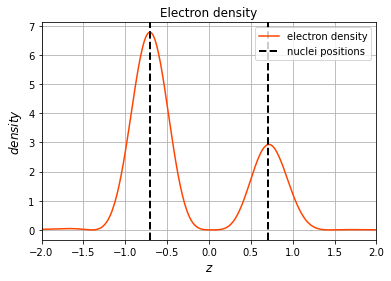

In [54]:
%pylab inline
z = np.linspace(-2,2, 300)
r = np.zeros([300,3])
r[:,-1] = z

import matplotlib.pyplot as plt 
fig, ax = plt.subplots()

plot(z,electron_density(r), color='orangered', label="electron density")
ax.set_xlabel(r'$z$', fontsize=12)
ax.set_ylabel(r'$density$', fontsize=12)
ax.set_title('Electron density')
ax.axvline(0.70053, linestyle='--', linewidth=2., color='black', label="nuclei positions")
ax.axvline(-0.70053, linestyle='--', linewidth=2., color='black')
ax.grid(True)
ax.set_xlim([-2,2])
ax.legend(loc=1); 

Cross-check whether the integration of electron density is equal number of electrons

In [55]:
scf_exec.integrator_3D.integrate(electron_density)

2.0000000000000124

# Summary

I have implemented the SCF procedure in python programing language. Python has several performance bugs, therefore it is not always sufficient for high performance computing tasks.

Nevertheless There is plenty of space for refactoring and optimization. Using scipy multidimensional integrators `scipy.integrate.nquad` took quite a long time, but maybe customizing it kwargs would also help in the future. 

Code should be open to extensions for other types of basis and types of integrators.

Calculation of our given system of H2 hydrogen molecule suffered from oscilating of the results. Also the given electron density is not satisfactory (We expected symetric electron density). The main cause was probably due to imperfectly computed two electron integrals which were significantly memory and performance consuming tasks.